In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Car_dataset.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [6]:
## Checking >null values<
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
## All calculated parameters
df.describe()

,Year,Selling_Price,Km_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Km_Driven', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_dataset = df[['Year', 'Selling_Price', 'Km_Driven', 'Fuel', 'Seller_Type','Transmission', 'Owner']]
# Exclude Car_Name because car names may be so many and can't be use as a feature for our model here

In [10]:
final_dataset.head()

,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [11]:
## Adding a Current_Year Feature having all column value 2021
## This festure will be used for age of car been used by owner = (Current_Year - Year)
final_dataset['Current_Year'] = 2021

In [12]:
final_dataset.head()

,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Current_Year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021


In [13]:
# Getting Car_Age
final_dataset['Car_Age'] = final_dataset['Current_Year'] - final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Current_Year,Car_Age
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021,14
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021,14
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021,9
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021,4
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021,7


In [15]:
# Removing irrelevant featured column i.e. Year and Current_Year as these 2 columns are getting nowhere for using in model
final_dataset.drop(['Year'], axis = 1, inplace = True)
final_dataset.drop(['Current_Year'], axis = 1, inplace = True)
final_dataset.head()

,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Car_Age
0,60000,70000,Petrol,Individual,Manual,First Owner,14
1,135000,50000,Petrol,Individual,Manual,First Owner,14
2,600000,100000,Diesel,Individual,Manual,First Owner,9
3,250000,46000,Petrol,Individual,Manual,First Owner,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [16]:
final_dataset.head()

,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Car_Age
0,60000,70000,Petrol,Individual,Manual,First Owner,14
1,135000,50000,Petrol,Individual,Manual,First Owner,14
2,600000,100000,Diesel,Individual,Manual,First Owner,9
3,250000,46000,Petrol,Individual,Manual,First Owner,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [17]:
# Converting encoded unicode
final_dataset = pd.get_dummies(final_dataset, drop_first = True) # First column should be deleted from "dummy variable trap"


In [18]:
# # Dummy variable trap = zeros and ones
# {Value1}   {Value2}   {Value3}
#    0          1          0     --> This will represent belonging to Value2 Category
#    1          0          0     --> This will represent belonging to Value1 Category
#    0          0          1     --> This will represent belonging to Value3 Category
# But when Value1==0 and Value2==0, It will actually represent belonging to Value3 itself

In [19]:
final_dataset.head()

,Selling_Price,Km_Driven,Car_Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0


In [20]:
!pip install seaborn
import seaborn as sbs

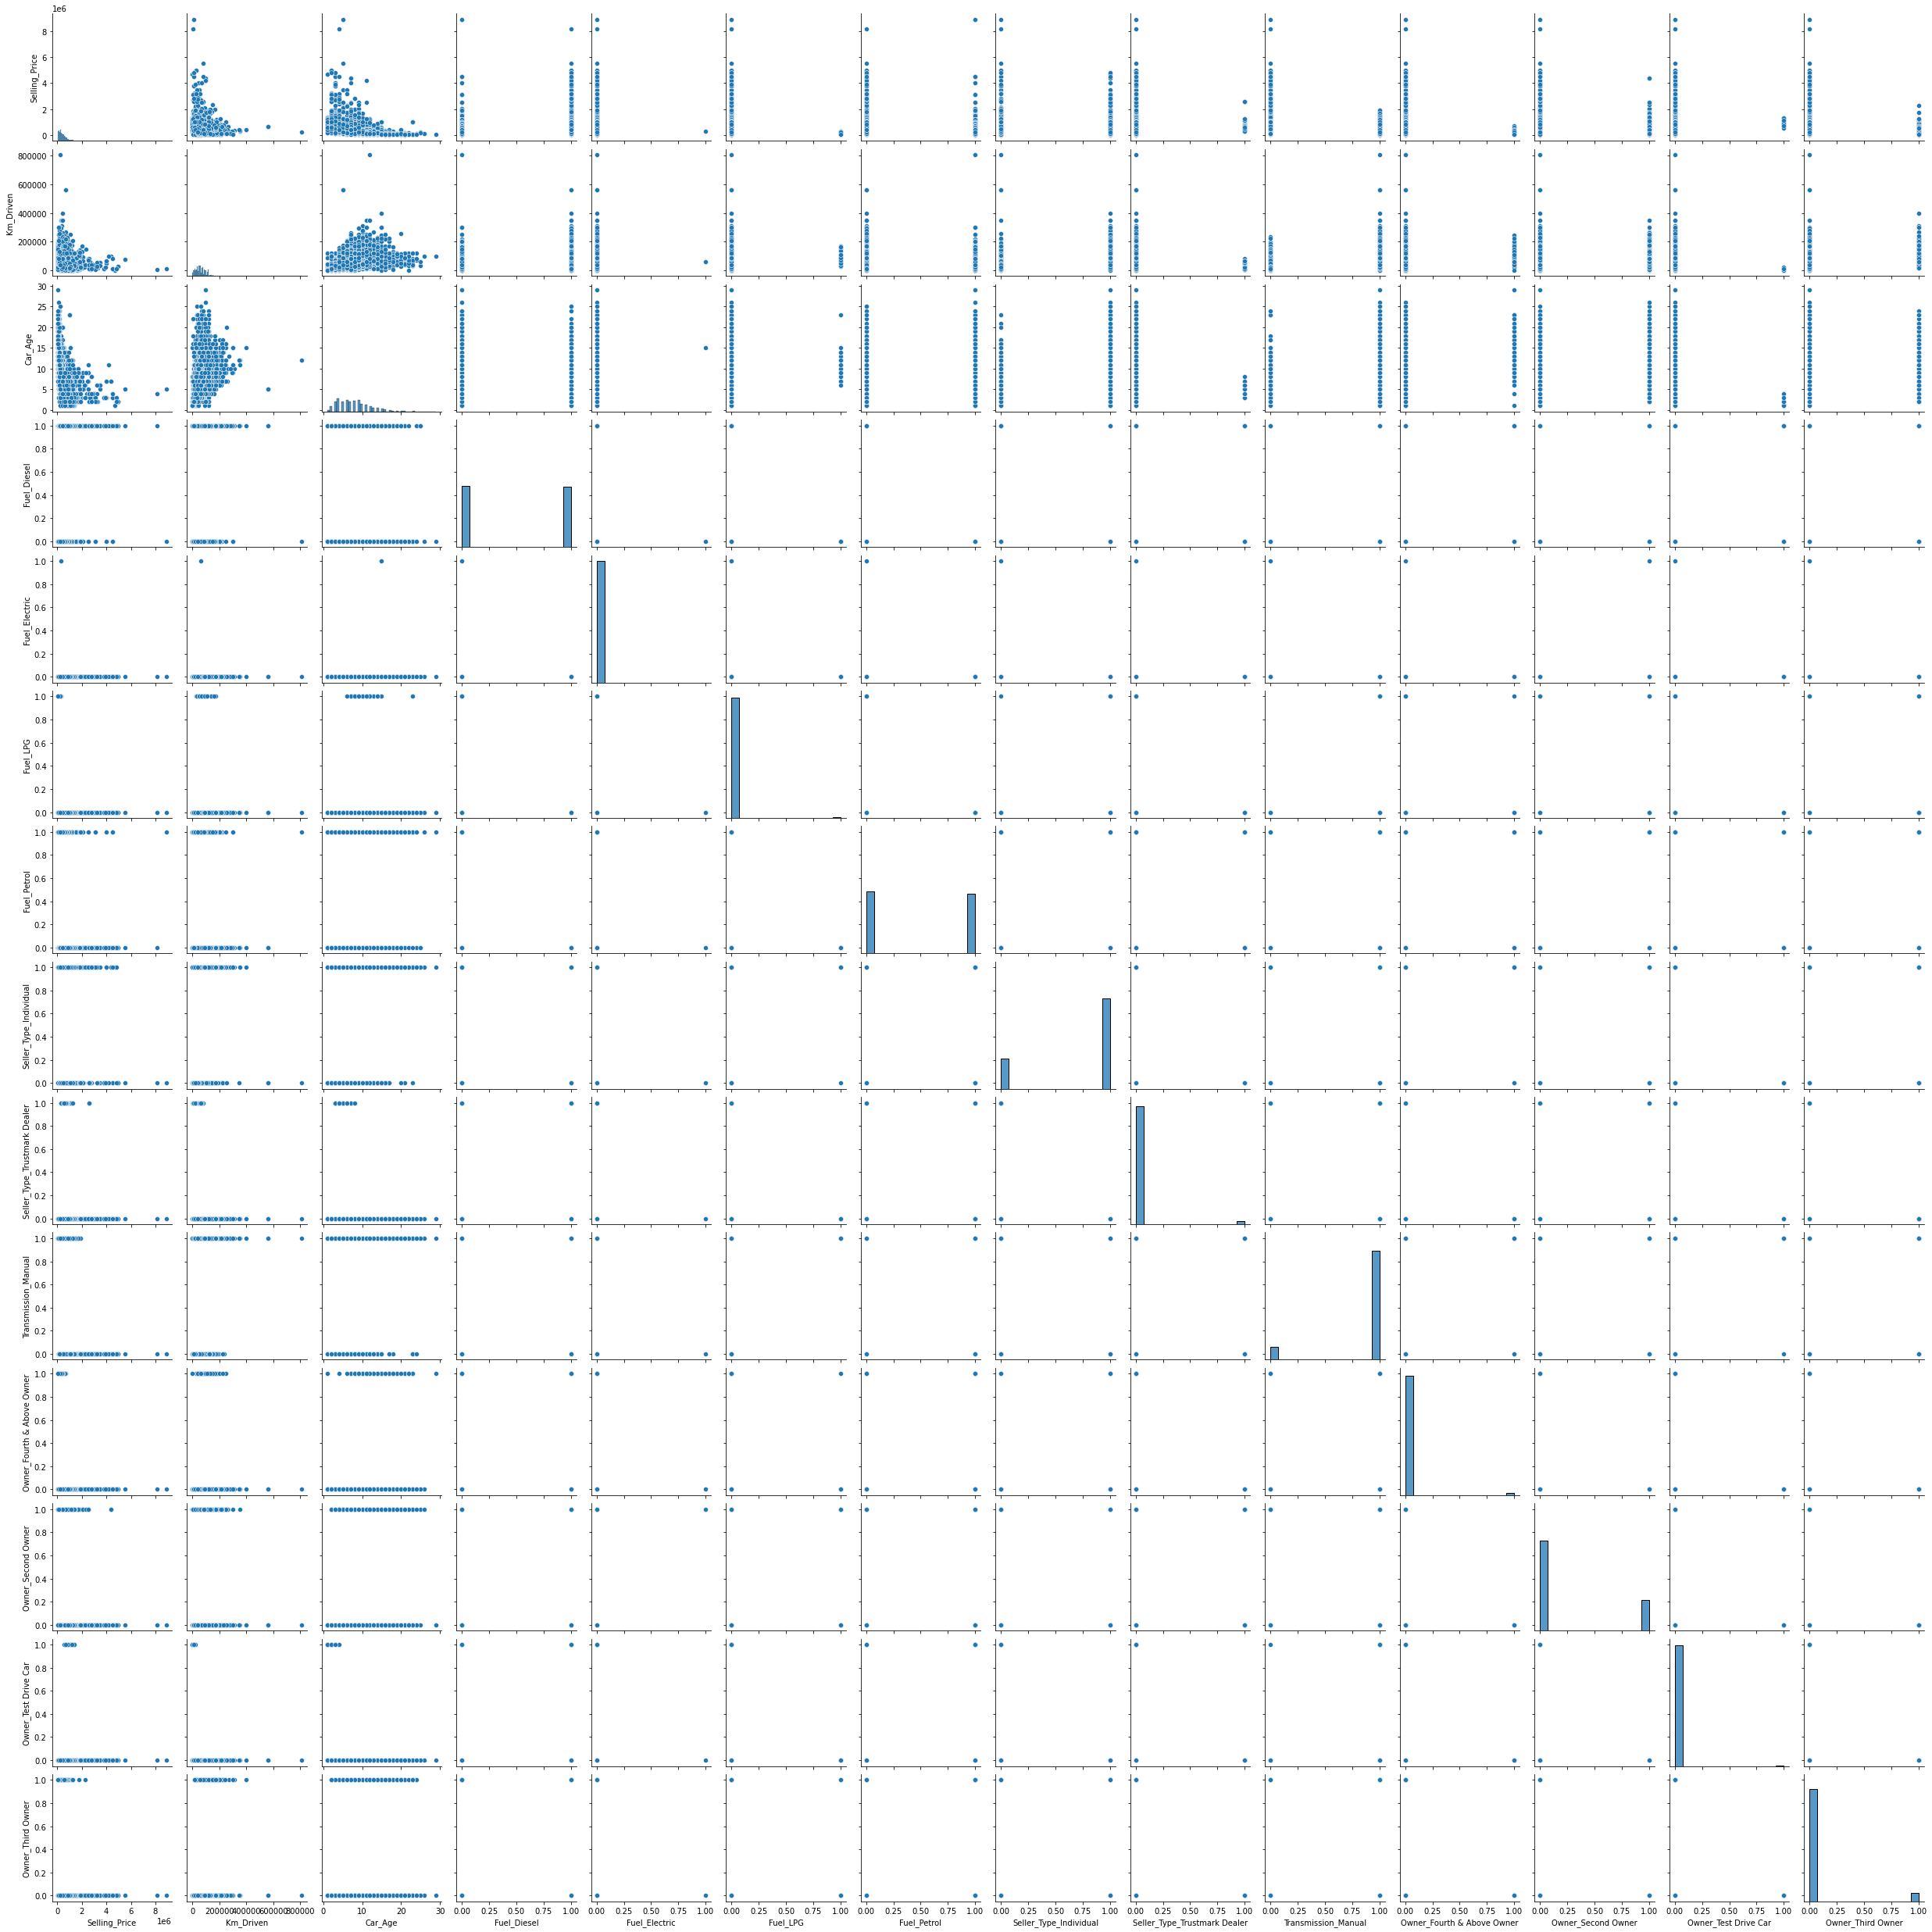

In [22]:
# Visualizing the dataset values that how the data looks like
sbs.pairplot(final_dataset)

In [26]:
!pip install matplotlib

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

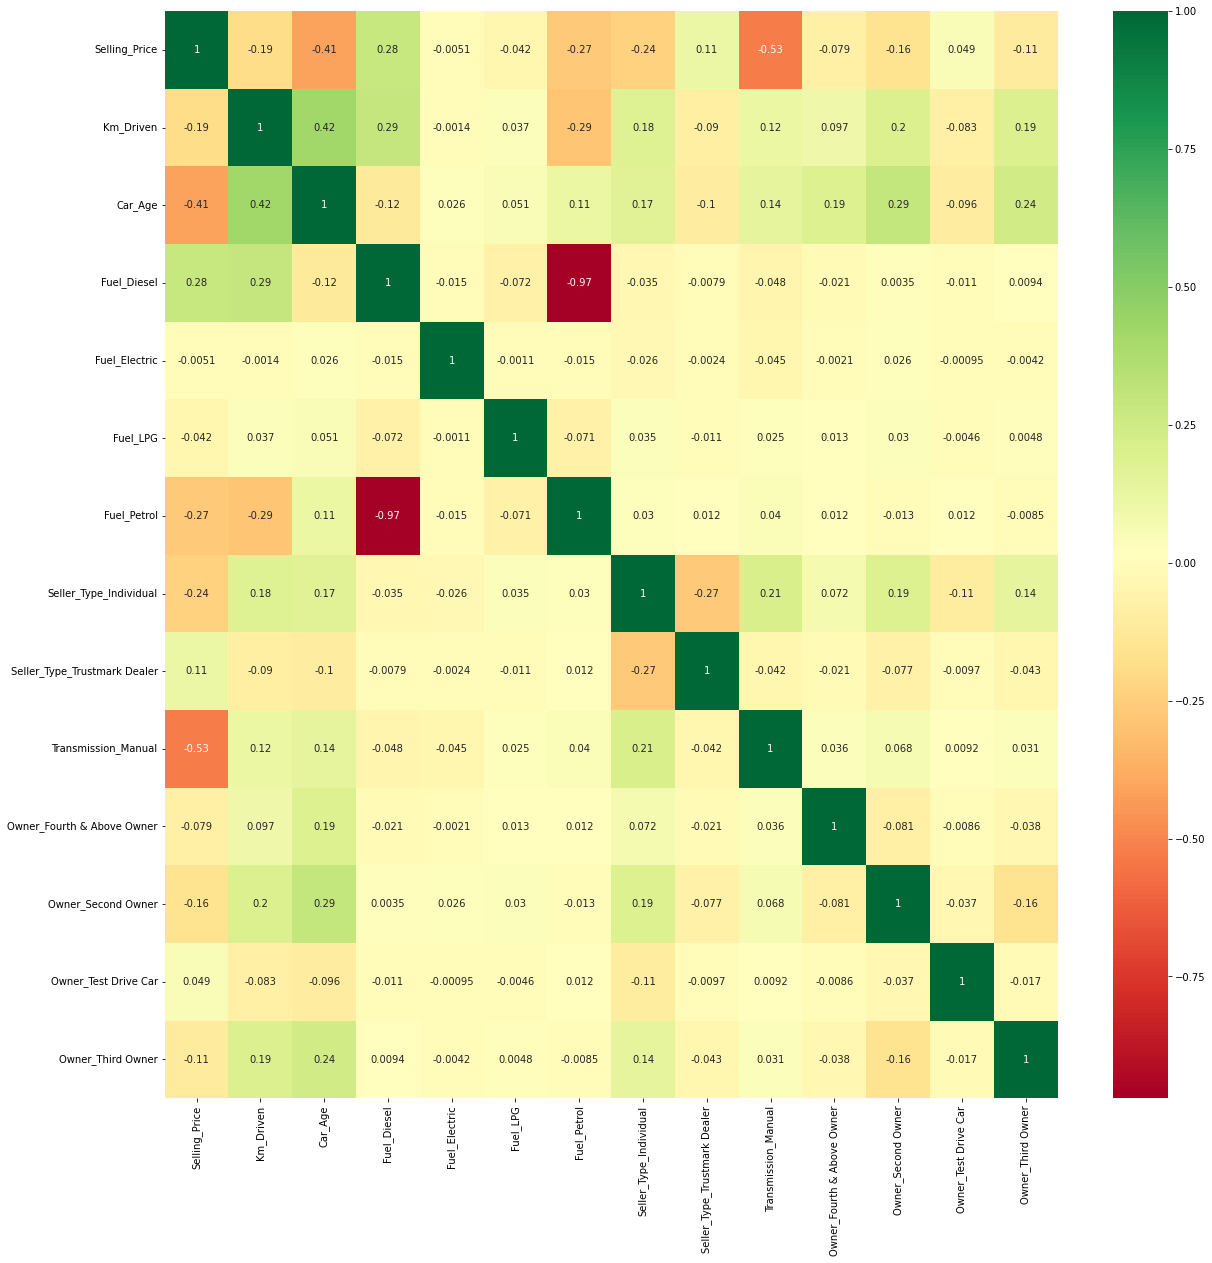

In [24]:
# Heatmapping the data
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20, 20))
# Visualize the heatmap
hmap = sbs.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [25]:
final_dataset.head()

,Selling_Price,Km_Driven,Car_Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,7,1,0,0,0,1,0,1,0,1,0,0


In [26]:
# independent and dependent features
X = final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]

In [27]:
X.head()

,Km_Driven,Car_Age,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,141000,7,1,0,0,0,1,0,1,0,1,0,0


In [28]:
Y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: Selling_Price, dtype: int64

In [29]:
# Features importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, Y)

ExtraTreesRegressor()

In [30]:
print(model.feature_importances_)

[2.47270519e-01 2.47190093e-01 1.29983386e-01 1.77409512e-05
 2.60847895e-05 1.98264102e-04 4.43121242e-02 8.66785561e-03
 2.92828463e-01 7.66604783e-04 2.34630287e-02 8.11533908e-04
 4.46430193e-03]


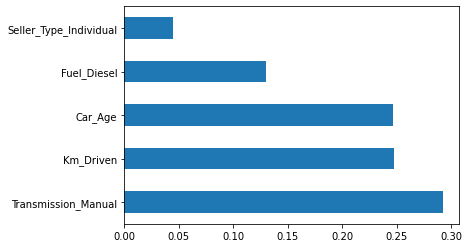

In [31]:
# Graph of feature importances
feat = pd.Series(model.feature_importances_, index = X.columns)
feat.nlargest(5).plot(kind = 'barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [33]:
X_train.shape

(3472, 13)

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
# Hyperparameters
#Randomized Search CV
import numpy as np

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [37]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [39]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [40]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [41]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  16.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [43]:
rf_random.best_score_

-110757635565.06429

In [44]:
predictions=rf_random.predict(X_test)

C:\Users\pc\.conda\envs\carpriceprdiction_project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

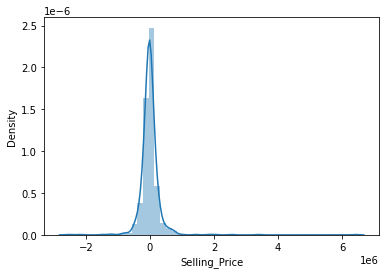

In [46]:
sbs.distplot(y_test-predictions)

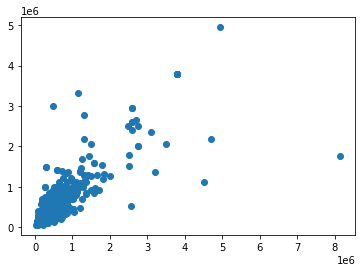

In [47]:
plt.scatter(y_test,predictions)

In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 164251.08298155604
MSE: 138164205283.84882
RMSE: 371704.459596396


In [50]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)